# Pytorch: nn Module

The `torch.tensor` is just a small part of `pytorch`.  The main contribution of the `pytorch` package is its `nn` module that is used to construct and train many kinds of neural networks.

Here we apply it to the two problems, one regression and one classification problem.

In [28]:
import numpy as np
import pandas
import torch

import time

import matplotlib.pyplot as plt
%matplotlib inline

## Regression

Load data for the air quality regression problem. `torch.nn` expects data to be `float32`.

In [29]:
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',', usecols=range(15), na_values=-200)
data = data[['Time', 'CO(GT)']]
data = data [:23*10]
data = data.dropna(axis=0)

hour = [int(t[:2]) for t in data['Time']]
X = np.array(hour).reshape(-1, 1).astype(np.float32)
CO = data['CO(GT)']
T = np.array(CO).reshape(-1, 1).astype(np.float32)
np.hstack((X, T))[:10]  # show the first 10 samples of hour, CO

array([[18. ,  2.6],
       [19. ,  2. ],
       [20. ,  2.2],
       [21. ,  2.2],
       [22. ,  1.6],
       [23. ,  1.2],
       [ 0. ,  1.2],
       [ 1. ,  1. ],
       [ 2. ,  0.9],
       [ 3. ,  0.6]], dtype=float32)

Since we are using `torch`, we must convert our data matrices, `X` and `T`, to `torch.tensors`.

Must standardize data ourselves.

In [30]:
Xmean = X.mean()
Xstd = X.std()
Tmean = T.mean()
Tstd = T.std()

X = (X - Xmean) / Xstd
T = (T - Tmean) / Tstd

In [31]:
Xt = torch.tensor(X)
Tt = torch.tensor(T)

In [32]:
n_inputs = Xt.shape[1]
n_hiddens = 10
n_outputs = Tt.shape[1]

Create the network.

In [33]:
nnet = torch.nn.Sequential(
    torch.nn.Linear(n_inputs, n_hiddens),
    torch.nn.Tanh(),
    torch.nn.Linear(n_hiddens, n_outputs))

Specify the loss function and the optimizer method.

In [34]:
loss_F = torch.nn.MSELoss()
learning_rate = 0.0001
optimizer = torch.optim.Adam(nnet.parameters(), lr=learning_rate)

Now we can train it.

In [35]:
for epoch in range(10000):
    Yt = nnet(Xt)
    
    error = loss_F(Yt, Tt)
    if epoch % 1000 == 0:
        print(f'Epoch {epoch} error {error}')
        
    error.backward()
    
    optimizer.step()

Epoch 0 error 1.0249958038330078
Epoch 1000 error 0.756424069404602
Epoch 2000 error 0.7658848166465759
Epoch 3000 error 0.7541773319244385
Epoch 4000 error 0.7321771383285522
Epoch 5000 error 0.7381395697593689
Epoch 6000 error 0.7490202784538269
Epoch 7000 error 0.7301877737045288
Epoch 8000 error 0.7159892320632935
Epoch 9000 error 0.7005356550216675


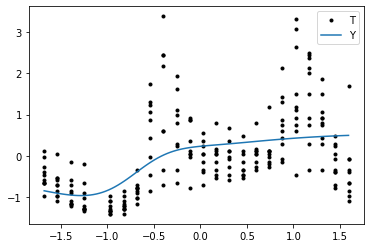

In [36]:
xs = np.linspace(0, 23, 100).reshape((-1, 1)).astype(np.float32)
xs = (xs - Xmean) / Xstd
xst = torch.tensor(xs)
Yt = nnet(xst)
plt.plot(Xt, Tt, 'k.', label='T')
plt.plot(xs, Yt.detach(), label='Y')
plt.legend();

Here is all the code together in one block. It assumes the data has been defined.

Epoch 0 error 1.5532629489898682
Epoch 200 error 0.6968544125556946
Epoch 400 error 0.5010784864425659
Epoch 600 error 0.3803490102291107
Epoch 800 error 0.3677822947502136
Epoch 1000 error 0.36495500802993774
Epoch 1200 error 0.363966703414917
Epoch 1400 error 0.3634241223335266
Epoch 1600 error 0.36300355195999146
Epoch 1800 error 0.3626324236392975


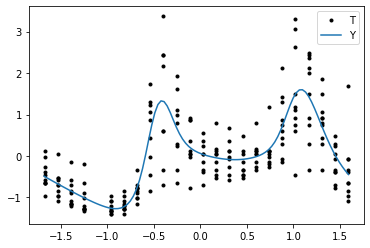

In [37]:
Xt = torch.tensor(X)
Tt = torch.tensor(T)

Xtmean = Xt.mean()
Xtstd = Xt.std()
Ttmean = Tt.mean()
Ttstd = Tt.std()

Xt = (Xt - Xtmean) / Xtstd
Tt = (Tt - Ttmean) / Ttstd

n_inputs = Xt.shape[1]
n_hiddens = 20
n_outputs = Tt.shape[1]

nnet = torch.nn.Sequential(
    torch.nn.Linear(n_inputs, n_hiddens),
    torch.nn.Tanh(),
    torch.nn.Linear(n_hiddens, n_outputs))

loss_F = torch.nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(nnet.parameters(), lr=learning_rate)

for epoch in range(2000):
    
    optimizer.zero_grad()
        
    Yt = nnet(Xt)
    
    error = loss_F(Yt, Tt)
    if epoch % 200 == 0:
        print(f'Epoch {epoch} error {error}')
        
    error.backward()
    
    optimizer.step()

xs = np.linspace(0, 23, 100).reshape((-1, 1)).astype(np.float32)
xs = (xs - Xmean) / Xstd
xst = torch.tensor(xs)
Yt = nnet(xst)
plt.plot(Xt, Tt, 'k.', label='T')
plt.plot(xs, Yt.detach(), label='Y')
plt.legend();

# Classification

Let's make some simple images of two different types to test the `torch.nn` module way of doing classification.

One type of image with be a diamond shape at various positions.  The other type will be a square.

In [38]:
def make_images(nEach):
    images = np.zeros((nEach * 2, 1, 20, 20))  # nSamples, nChannels, rows, columns
    radii = 3 + np.random.randint(10 - 5, size=(nEach * 2, 1))
    centers = np.zeros((nEach * 2, 2))
    for i in range(nEach * 2):
        r = radii[i, 0]
        centers[i, :] = r + 1 + np.random.randint(18 - 2 * r, size=(1, 2))
        x = int(centers[i, 0])
        y = int(centers[i, 1])
        if i < nEach:
            # squares
            images[i, 0, x - r:x + r, y + r] = 1.0
            images[i, 0, x - r:x + r, y - r] = 1.0
            images[i, 0, x - r, y - r:y + r] = 1.0
            images[i, 0, x + r, y - r:y + r + 1] = 1.0
        else:
            # diamonds
            images[i, 0, range(x - r, x), range(y, y + r)] = 1.0
            images[i, 0, range(x - r, x), range(y, y - r, -1)] = 1.0
            images[i, 0, range(x, x + r + 1), range(y + r, y - 1, -1)] = 1.0
            images[i, 0, range(x, x + r), range(y - r, y)] = 1.0
            # images += np.random.randn(*images.shape) * 0.5
            T = np.ones((nEach * 2, 1))
            T[nEach:] = 2
    return images.astype(np.float32), T.astype(np.float32)

Xtrain, Ttrain = make_images(100)
Xtest, Ttest = make_images(10)
Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((200, 1, 20, 20), (200, 1), (20, 1, 20, 20), (20, 1))

In [39]:
Ttest

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.]], dtype=float32)

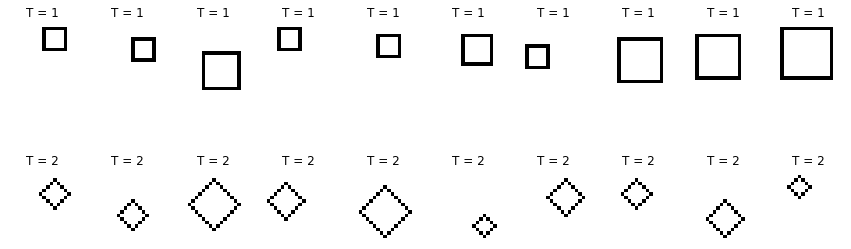

In [40]:
plt.figure(figsize=(15, 5))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(Xtest[i, 0, :, :], cmap=plt.cm.binary)
    plt.title(f'T = {int(Ttest[i, 0])}')
    plt.axis('off');

To send these images as input into a neural network, each image must be flattened.  In this case, each image will be 20 x 20 or 400 pixel intensities.

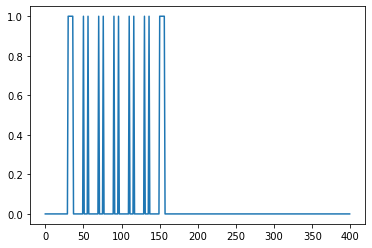

In [41]:
plt.plot(Xtest[0, 0, :, :].reshape((-1)))

In [42]:
Xtrain_flat = Xtrain.reshape((-1, 400))
Xtrain_flat.shape

(200, 400)

In [43]:
Xtest_flat = Xtest.reshape((-1, 400))
Xtest_flat.shape

(20, 400)

In [44]:
classes = np.unique(Ttrain)
classes

array([1., 2.], dtype=float32)

In [45]:
_, Ttrain_0 = np.where(Ttrain == classes)
_, Ttest_0 = np.where(Ttest == classes)
Ttest_0

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Epoch 0 error 0.69751
Epoch 50 error 0.00072
Epoch 100 error 0.00031
Epoch 150 error 0.00021
12 out of 20 test samples correctly classified.


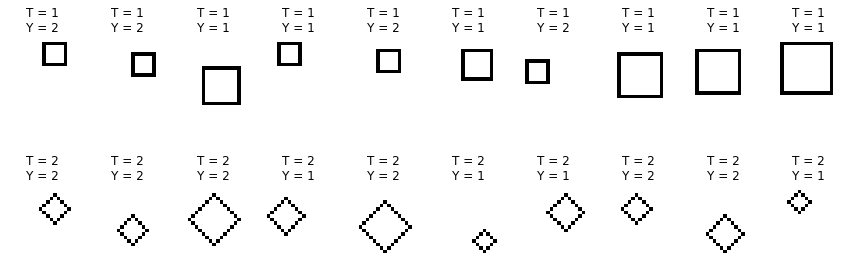

In [46]:
classes = np.unique(Ttrain)
_, Ttrain_0 = np.where(Ttrain == classes)
_, Ttest_0 = np.where(Ttest == classes)

Xtraint = torch.tensor(Xtrain_flat)
Ttraint = torch.tensor(Ttrain_0)
Xtestt = torch.tensor(Xtest_flat)
Ttestt = torch.tensor(Ttest_0)

Xtmean = Xtraint.mean(0)
Xtstd = Xtraint.std(0)

if False:
    Xtraint = (Xtraint - Xtmean) / Xtstd
    Xtestt = (Xtestt - Xtmean) / Xtstd

n_inputs = Xtraint.shape[1]
n_hiddens = 20
n_outputs = len(classes)

nnet = torch.nn.Sequential(
    torch.nn.Linear(n_inputs, n_hiddens),
    torch.nn.Tanh(),
    torch.nn.Linear(n_hiddens, n_outputs))

loss_F = torch.nn.CrossEntropyLoss()

learning_rate = 0.01
optimizer = torch.optim.Adam(nnet.parameters(), lr=learning_rate)

for epoch in range(200):
    
    optimizer.zero_grad()
    
    Ytraint = nnet(Xtraint)
    
    error = loss_F(Ytraint, Ttraint)
    if epoch % 50 == 0:
        print(f'Epoch {epoch} error {error:.5f}')
        
    error.backward()
    
    optimizer.step()

Ytestt = nnet(Xtestt)
Ytest = Ytestt.detach().numpy()
Ytestclasses = classes[Ytest.argmax(axis=1)].reshape((-1, 1))
plt.figure(figsize=(15, 5))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(Xtest[i, 0, :, :], cmap=plt.cm.binary)
    plt.title(f'T = {int(Ttest[i, 0])}\nY = {int(Ytestclasses[i])}')
    plt.axis('off')
    
print(f'{np.sum(Ttest == Ytestclasses)} out of {Ttest.shape[0]} test samples correctly classified.')

In [47]:
def number_of_weights(torch_nnet):
    return sum([p.nelement() for p in torch_nnet.parameters()])

number_of_weights(nnet)

8062

Hard to predict correct class on test data.  The particular sizes and locations of objects in test images may not have been seen in training data.  Need a way to discover small features, like vertical, horizontal, diagonal lines, that would help predict correct class.

This is exactly what convolutional units are designed for!

# Classification with Convolutional Nets

In [48]:
Xtraint.shape

torch.Size([200, 400])

Epoch 0 error 0.72324
Epoch 50 error 0.00053
Epoch 100 error 0.00033
Epoch 150 error 0.00025
Epoch 200 error 0.00021
Epoch 250 error 0.00017
Epoch 300 error 0.00014
Epoch 350 error 0.00012
20 out of 20 test samples correctly classified.


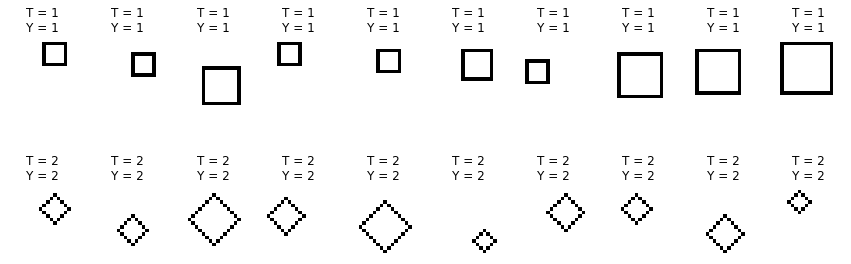

In [49]:
classes = np.unique(Ttrain)
_, Ttrain_0 = np.where(Ttrain == classes)
_, Ttest_0 = np.where(Ttest == classes)

Xtraint = torch.tensor(Xtrain)
Ttraint = torch.tensor(Ttrain_0)
Xtestt = torch.tensor(Xtest)
Ttestt = torch.tensor(Ttest_0)

Xtmean = Xtraint.mean(0)
Xtstd = Xtraint.std(0)

# Xtraint = (Xtraint - Xtmean) / Xtstd
# Xtestt = (Xtestt - Xtmean) / Xtstd
Xtraint = Xtraint
Xtestt = Xtestt

n_channels = Xtraint.shape[1]
n_outputs = len(classes)

nnet = torch.nn.Sequential()

n_units = 1
kernel_size = 5
kernel_stride = 2
nnet.add_module('conv_1', torch.nn.Conv2d(n_channels, n_units, kernel_size, kernel_stride))
nnet.add_module('relu_1', torch.nn.ReLU())
n_windows = (Xtraint.shape[2] - kernel_size) // kernel_stride + 1

if False:
    n_units_previous = n_units
    n_units = 3
    kernel_size = 3
    kernel_stride = 1
    nnet.add_module('conv_2', torch.nn.Conv2d(n_units_previous, n_units, kernel_size, kernel_stride))
    nnet.add_module('relu_2', torch.nn.ReLU())
    n_windows = (n_windows - kernel_size) // kernel_stride + 1

nnet.add_module('flatten', torch.nn.Flatten())
n_units_previous = n_units
n_units = 3
n_inputs = n_units_previous * n_windows ** 2
nnet.add_module('linear_1', torch.nn.Linear(n_inputs, n_units))
nnet.add_module('tanh', torch.nn.Tanh())

nnet.add_module('linear 2', torch.nn.Linear(n_units, n_outputs))


loss_F = torch.nn.CrossEntropyLoss()

learning_rate = 0.1
optimizer = torch.optim.Adam(nnet.parameters(), lr=learning_rate)

for epoch in range(400):
    
    optimizer.zero_grad()
    
    Ytraint = nnet(Xtraint)
    
    error = loss_F(Ytraint, Ttraint)
    if epoch % 50 == 0:
        print(f'Epoch {epoch} error {error:.5f}')
        
    error.backward()
    
    optimizer.step()

Ytestt = nnet(Xtestt)
Ytest = Ytestt.detach().numpy()
Ytestclasses = classes[Ytest.argmax(axis=1)].reshape((-1, 1))
plt.figure(figsize=(15, 5))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(Xtest[i, 0, :, :], cmap=plt.cm.binary)
    plt.title(f'T = {int(Ttest[i, 0])}\nY = {int(Ytestclasses[i])}')
    plt.axis('off')
    
print(f'{np.sum(Ttest == Ytestclasses)} out of {Ttest.shape[0]} test samples correctly classified.')

In [50]:
number_of_weights(nnet)

229

In [51]:
nnet.conv_1.weight

Parameter containing:
tensor([[[[-0.7923, -1.1128, -0.7803, -1.6528,  0.1891],
          [ 0.1147,  0.8907,  1.5126, -0.4230,  0.4156],
          [ 0.1771,  0.7354,  0.7143,  0.0996,  0.5938],
          [-1.3708, -0.3149, -0.8504, -1.3753, -0.3020],
          [-0.0388,  0.8889,  0.5732,  0.2721,  0.3973]]]], requires_grad=True)

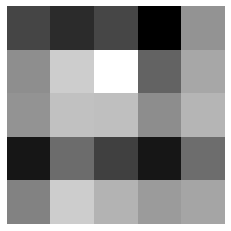

In [52]:
w = nnet.conv_1.weight.detach()
for uniti in range(w.shape[0]):
    plt.subplot(1, w.shape[0], uniti + 1)
    plt.imshow(w[uniti, 0, :, :], cmap=plt.cm.gray)
    plt.axis('off')